# Principal Component Analysis



In [28]:
# You will need the usual libraries; numpy, matplotlib
%matplotlib inline
import numpy
import pandas
import matplotlib.pyplot
import sklearn

In [29]:
# PCA does quite well with the iris data
# Like all the sklearn.datasets, when you load_iris()
# you will get an object where the data (stem lengths,
# petal widths, etc. is in ['data'] and the target 
# (what kind of iris it is) in ['target']
# You can remind yourself of the data columns by 
# looking a ['feature_names']
from sklearn.datasets import load_iris

iris = sklearn.datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [30]:
# Import sklearn.decomposition and create a PCA object
# We'll only be interested in the two most important 
# components
import sklearn.decomposition
pca = sklearn.decomposition.PCA(whiten=True, n_components=2)

In [31]:
# Transform the iris_data with your PCA object
# (you don't need the "target" for this, just the "data")
mangled_iris_data = pca.fit_transform(X)
mangled_iris_data

array([[-1.31027769, -0.665813  ],
       [-1.32549971,  0.34565409],
       [-1.41064601,  0.27998911],
       [-1.34065489,  0.63424977],
       [-1.33194435, -0.68072975],
       [-1.1129166 , -1.52440999],
       [-1.37699885,  0.16737608],
       [-1.28209956, -0.34738382],
       [-1.40973759,  1.1636137 ],
       [-1.30521934,  0.21749888],
       [-1.22354423, -1.32901741],
       [-1.27558808, -0.04387139],
       [-1.36066719,  0.4642651 ],
       [-1.57435995,  1.02597306],
       [-1.29042788, -2.41814543],
       [-1.16366981, -2.74138051],
       [-1.28016857, -1.66773589],
       [-1.29276097, -0.65058354],
       [-1.07346515, -1.79240366],
       [-1.26299568, -1.06102374],
       [-1.12787054, -0.81108278],
       [-1.24146305, -0.89703705],
       [-1.56979935, -0.28869375],
       [-1.12425674, -0.21511573],
       [-1.1501491 ,  0.06362304],
       [-1.22422296,  0.28347656],
       [-1.20525311, -0.28109342],
       [-1.25081394, -0.763822  ],
       [-1.28861104,

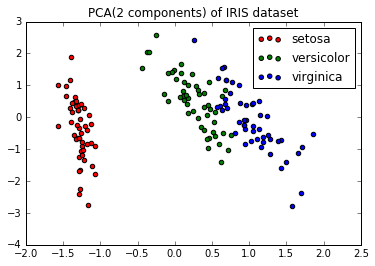

In [32]:
# (Optional) Plot this decomposed data on a scatter plot
# It is often helpful to do three scatter plots on top of
# each other, so that the setosa can be read points,
# the versicolor green and the virginica blue

matplotlib.pyplot.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    matplotlib.pyplot.scatter(mangled_iris_data[y == i, 0], mangled_iris_data[y == i, 1], c=c, label=target_name)
matplotlib.pyplot.legend()
matplotlib.pyplot.title('PCA(2 components) of IRIS dataset')

In [33]:
# How much of the variance in the data is explained by the
# first component of this decomposed data?
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

In [34]:
# How much by the second?
for r in pca.explained_variance_ratio_:
    print "%.2f" % (r*100,)

92.46
5.30


In [17]:
# Have a look at the first (principal) component
# Which features (sepal length, sepal width, petal length, petal width)
# does it use, and how much of each?
pca.components_
pca.components_[0]

array([ 0.36158968, -0.08226889,  0.85657211,  0.35884393])

In [18]:
# We have thrown away data, and we'd like to know how badly
# this has affected the original.
# Use the inverse_transform() method to take your decomposed
# data and turn it back into 4-dimensional lengths / widths / etc.

reconstituted_iris_data = pca.inverse_transform(mangled_iris_data)
reconstituted_iris_data

array([[ 5.08718247,  3.51315614,  1.4020428 ,  0.21105556],
       [ 4.75015528,  3.15366444,  1.46254138,  0.23693223],
       [ 4.70823155,  3.19151946,  1.30746874,  0.17193308],
       [ 4.64598447,  3.05291508,  1.46083069,  0.23636736],
       [ 5.07593707,  3.5221472 ,  1.36273698,  0.19458132],
       [ 5.50989516,  3.78723092,  1.67433436,  0.32467514],
       [ 4.7694235 ,  3.22615887,  1.35680169,  0.19254092],
       [ 5.00550246,  3.39442465,  1.47894375,  0.24343917],
       [ 4.42432566,  2.87507076,  1.38524961,  0.20498258],
       [ 4.80645134,  3.19611998,  1.48707882,  0.2471443 ],
       [ 5.36502046,  3.73593422,  1.49705681,  0.25051099],
       [ 4.91257705,  3.28468422,  1.51653888,  0.25934854],
       [ 4.68590546,  3.11713427,  1.41105778,  0.21542658],
       [ 4.34671081,  2.95208408,  1.08451013,  0.07892134],
       [ 5.66623966,  4.13706246,  1.28578689,  0.16143081],
       [ 5.86423565,  4.23140216,  1.48034672,  0.24276779],
       [ 5.43216343,  3.

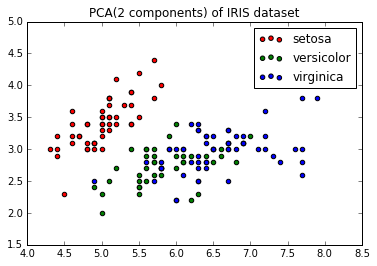

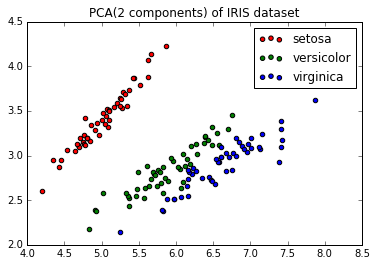

In [19]:
# Create some scatter plots where you compare the "clean" data
# with the simplified data.
# e.g. do a scatter plot of sepal length and sepal width with
# both datasets.

matplotlib.pyplot.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    matplotlib.pyplot.scatter(X[y == i, 0], X[y == i, 1], c=c, label=target_name)
matplotlib.pyplot.legend()
matplotlib.pyplot.title('PCA(2 components) of IRIS dataset')
matplotlib.pyplot.show()

for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    matplotlib.pyplot.scatter(reconstituted_iris_data[y == i, 0], reconstituted_iris_data[y == i, 1], c=c, label=target_name)
matplotlib.pyplot.legend()
matplotlib.pyplot.title('PCA(2 components) of IRIS dataset')
matplotlib.pyplot.show()

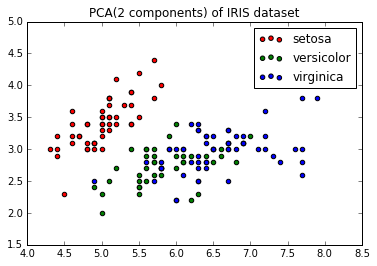

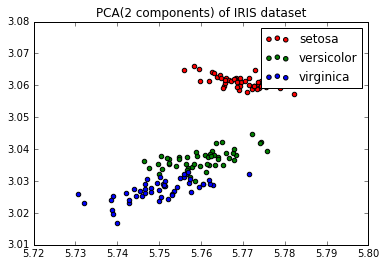

In [39]:
# (Optional) What happens if you use SparsePCA instead of PCA

sparse_pca = sklearn.decomposition.SparsePCA(n_components=2)

mangled_sparse_iris_data = sparse_pca.fit_transform(X)

reconstituted_sparse_iris_data = pca.inverse_transform(mangled_sparse_iris_data)

matplotlib.pyplot.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    matplotlib.pyplot.scatter(X[y == i, 0], X[y == i, 1], c=c, label=target_name)
matplotlib.pyplot.legend()
matplotlib.pyplot.title('PCA(2 components) of IRIS dataset')
matplotlib.pyplot.show()

for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    matplotlib.pyplot.scatter(reconstituted_sparse_iris_data[y == i, 0],
                              reconstituted_sparse_iris_data[y == i, 1], 
                              c=c, 
                              label=target_name)
matplotlib.pyplot.legend()
matplotlib.pyplot.title('PCA(2 components) of IRIS dataset')
matplotlib.pyplot.show()